# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [39]:
df['flag_doente'].value_counts()

0    164
1    139
Name: flag_doente, dtype: int64

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [41]:
# Criando a função que monta a análise bivariada  

# Número de variáveis resposta por categoria da variável explicativa
# - Total
# - Quantidade média
# - *Odds*
# - *Odds ratio* (Use o total como referência)
# - Logito (LOG(*Odds*))
# - O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE)

def bivariada(df, var_resp, var_exp):
    """
    Perform bivariate analysis between a categorical explanatory variable and a binary response variable.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    var_resp (str): The name of the binary response variable (e.g., 'flag_doente').
    var_exp (str): The name of the categorical explanatory variable.

    Returns:
    pd.DataFrame: A table showing the contingency and various statistical metrics.
    """

    # Create a contingency table
    tab = pd.crosstab(index=df[var_exp], columns=df[var_resp], margins=True, margins_name='Total')
    
    # Calculate the proportion of positive responses
    tab['media_doentes'] = tab[1] / tab['Total']

    # Calculate odds for each category
    tab['odds'] = tab[1] / tab[0]

    # Calculate odds ratio relative to the overall odds
    overall_odds = tab['odds']['Total']
    tab['odds_ratio'] = tab['odds'] / overall_odds

    # Calculate the logit (log of odds)
    tab['logito'] = np.log(tab['odds'])

    # Calculate Weight of Evidence (WOE)
    tab['WOE'] = np.log(tab['odds_ratio'])

    # Remove the 'Total' row for clarity
    tab = tab.drop('Total')

    return tab

# Example usage with qualitative variables: restecg, cp, slope
restecg = bivariada(df, 'flag_doente', 'restecg')
cp = bivariada(df, 'flag_doente', 'cp')
slope = bivariada(df, 'flag_doente', 'slope')
fbs = bivariada(df, 'flag_doente', 'fbs')
sex = bivariada(df, 'flag_doente', 'sex')



In [42]:
restecg

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911


In [43]:
cp

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791


In [44]:
slope

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706,-1.079920,-0.914528
2.0,49,91,140,0.650000,1.857143,2.191161,0.619039,0.784432
3.0,9,12,21,0.571429,1.333333,1.573141,0.287682,0.453075


In [45]:
fbs

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
fbs,,,,,,,,
0.0,141,117,258,0.453488,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.488889,0.956522,1.128558,-0.044452,0.120941


In [46]:
sex

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [47]:
# 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
# Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.

def bivariada_quantitativa(df, var_resp, var_exp, n_groups=5):
    
    # Create a copy of the DataFrame    
    df = df.copy()
    
    # Create a new column with the quantile group
    df['group'] = pd.qcut(df[var_exp], n_groups, duplicates='drop')
    
    # Create a contingency table
    tab = pd.crosstab(index=df['group'], columns=df[var_resp], margins=True, margins_name='Total')

    # Calculate the proportion of positive responses
    tab['media_doentes'] = tab[1] / tab['Total']

    # Calculate odds for each category
    tab['odds'] = tab[1] / tab[0]

    # Calculate odds ratio relative to the overall odds
    overall_odds = tab['odds']['Total']
    tab['odds_ratio'] = tab['odds'] / overall_odds

    # Calculate the logit (log of odds)
    tab['logito'] = np.log(tab['odds'])

    # Calculate Weight of Evidence (WOE)
    tab['WOE'] = np.log(tab['odds_ratio'])

    # Remove the 'Total' row for clarity
    tab = tab.drop('Total')

    return tab

# Example usage with quantitative variable: age
age = bivariada_quantitativa(df, 'flag_doente', 'age', n_groups=5)
trestbps = bivariada_quantitativa(df, 'flag_doente', 'trestbps', n_groups=5)

In [48]:
age

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
group,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392


In [49]:
trestbps

flag_doente,0,1,Total,media_doentes,odds,odds_ratio,logito,WOE
group,,,,,,,,
"(93.999, 120.0]",60,37,97,0.381443,0.616667,0.727578,-0.483427,-0.318034
"(120.0, 126.0]",10,15,25,0.600000,1.500000,1.769784,0.405465,0.570858
"(126.0, 134.0]",35,27,62,0.435484,0.771429,0.910175,-0.259511,-0.094119
"(134.0, 144.6]",34,24,58,0.413793,0.705882,0.832840,-0.348307,-0.182914
"(144.6, 200.0]",25,36,61,0.590164,1.440000,1.698993,0.364643,0.530036


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [50]:
import statsmodels.formula.api as smf

formula = 'flag_doente ~ sex + cp + trestbps + age'

model = smf.logit(formula=formula, data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.2605
Time:                        17:24:45   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

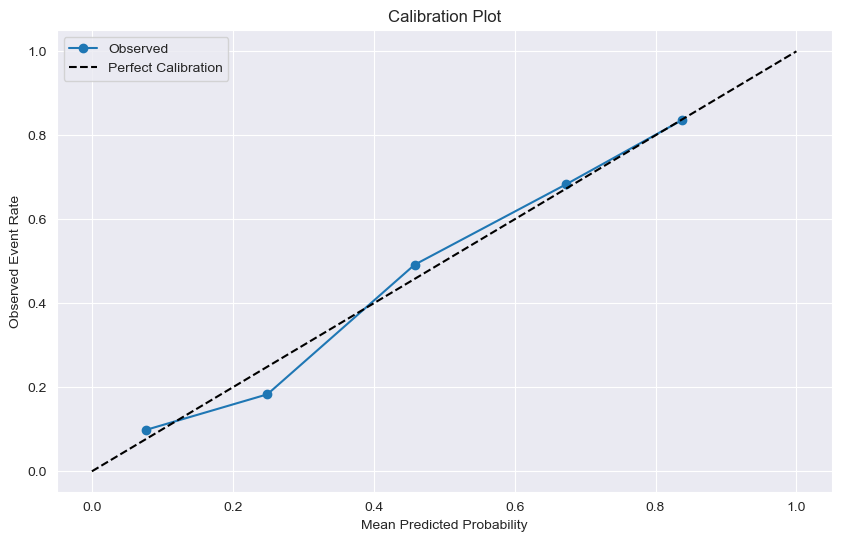

In [52]:
# Calcule a probabilidade de evento predita
predicted_probabilities = model.predict(df)
df['predicted_prob'] = predicted_probabilities

# Categorize essa probabilidade em G=5 grupos   
df['prob_group'] = pd.qcut(df['predicted_prob'], 5, duplicates='drop')

# Calcule a probabilidade média predita por grupo
grouped_data = df.groupby('prob_group')['predicted_prob'].mean().reset_index()
grouped_data.rename(columns={'predicted_prob': 'mean_predicted_prob'}, inplace=True)


# Calcule a taxa de eventos observada por grupo
grouped_data['observed_event_rate'] = df.groupby('prob_group')['flag_doente'].mean().values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['mean_predicted_prob'], grouped_data['observed_event_rate'], 'o-', label='Observed')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Observed Event Rate')
plt.title('Calibration Plot')
plt.legend()
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Accuracy: 0.7789
GINI Coefficient: 0.6622
KS Statistic: 0.5840


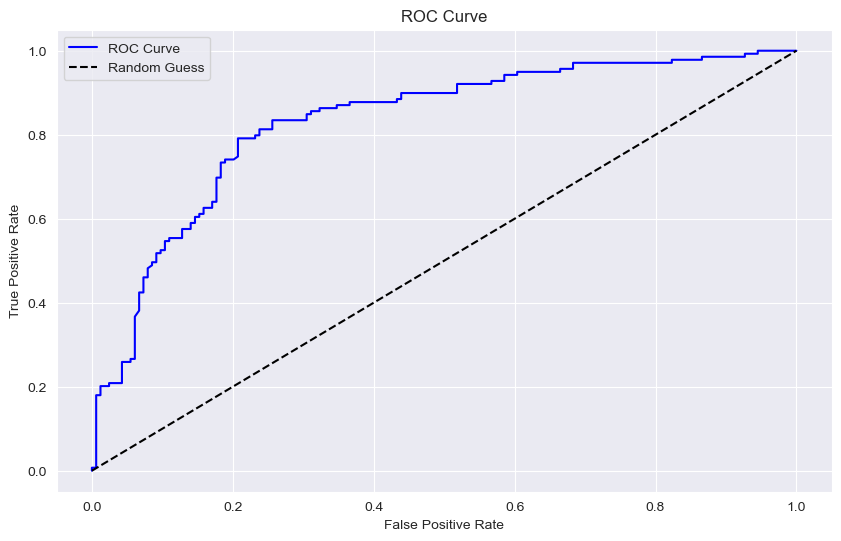

In [58]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Converta probabilidades em predições binárias com base em um threshold (0.5 por padrão)
def evaluate_binary_classification_performance(target, predicted_probabilities, threshold=0.5):
    """
    Evaluate a binary classification model's performance by calculating accuracy, GINI coefficient, 
    KS statistic, and plotting the ROC curve.

    Parameters:
    - target: array-like, true binary labels (e.g., 0 or 1)
    - predicted_probabilities: array-like, predicted probabilities for the positive class
    - threshold: float, threshold for classifying positive/negative predictions (default: 0.5)

    Returns:
    - metrics: dict, containing accuracy, GINI coefficient, and KS statistic
    """
    # Convert probabilities to binary predictions based on the threshold
    predicted_classes = (predicted_probabilities >= threshold).astype(int)

    # Calculate Accuracy
    accuracy = accuracy_score(target, predicted_classes)

    # Calculate GINI Coefficient
    auc = roc_auc_score(target, predicted_probabilities)
    gini_coefficient = 2 * auc - 1

    # Calculate KS Statistic
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target, predicted_probabilities)
    ks_statistic = max(true_positive_rate - false_positive_rate)

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"GINI Coefficient: {gini_coefficient:.4f}")
    print(f"KS Statistic: {ks_statistic:.4f}")

    # Plot the ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'gini_coefficient': gini_coefficient,
        'ks_statistic': ks_statistic
    }

    return metrics

# Example usage
# Assuming 'df' is your DataFrame with columns 'flag_doente' (true labels) and 'predicted_prob' (predicted probabilities)

# df = pd.read_csv('your_dataset.csv')
target = df['flag_doente']
predicted_probabilities = df['predicted_prob']

metrics = evaluate_binary_classification_performance(target, predicted_probabilities, threshold=0.5)

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [59]:
formula = 'flag_doente ~ sex + cp + trestbps + age + slope'   

model = smf.logit(formula=formula, data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.472334
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.3152
Time:                        17:43:02   Log-Likelihood:                -143.12
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.013e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4607      1.745     -7.139      0.000     -15.882      -9.040
sex            1.8826      0.

Accuracy: 0.7822
GINI Coefficient: 0.7094
KS Statistic: 0.5758


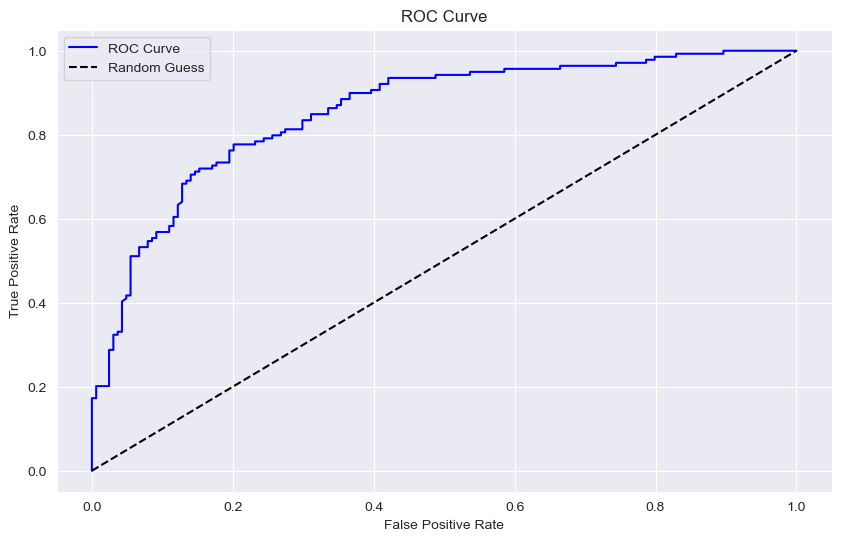

In [60]:
target = df['flag_doente']
predicted_probabilities = model.predict(df)

metrics = evaluate_binary_classification_performance(target, predicted_probabilities, threshold=0.5)

A Variável ```slope``` adicionada melhorou o modelo em todas as métricas.